## Random Forest Regression

>Data:
The code begins by loading a dataset named "cleaned_data.csv" using Pandas and proceeds with preprocessing steps.'New_Price' column is converted to float after removing non-numeric characters like 'Lakh' and 'Cr'. Categorical variables such as 'Fuel_Type', 'Transmission', and 'Owner_Type' are one-hot encoded to prepare the data for modeling. Subsequently, the dataset is split into features (X) and the target variable (y), with 'Price' being the target. Features include all columns except 'Name', 'Price', and 'Location'. An 80-20 train-test split is applied to evaluate the model's performance.

>Model Training:
The Random Forest Regressor model is then trained on the training data, followed by predicting prices for the testing data. Model evaluation is conducted using Mean Squared Error (MSE) on the testing data to assess the model's accuracy. 

>Visualization:
Additionally, the code visualizes feature importance using a bar plot, highlighting the most influential features in predicting the target variable (price).

Overall, the code demonstrates a machine learning workflow for training a Random Forest regression model to predict prices based on various features in the dataset. It includes data preprocessing, model training, evaluation, and visualization of feature importance, providing insights into the factors influencing the target variable (price).

Mean Squared Error on Testing Data: 16.646954264545442


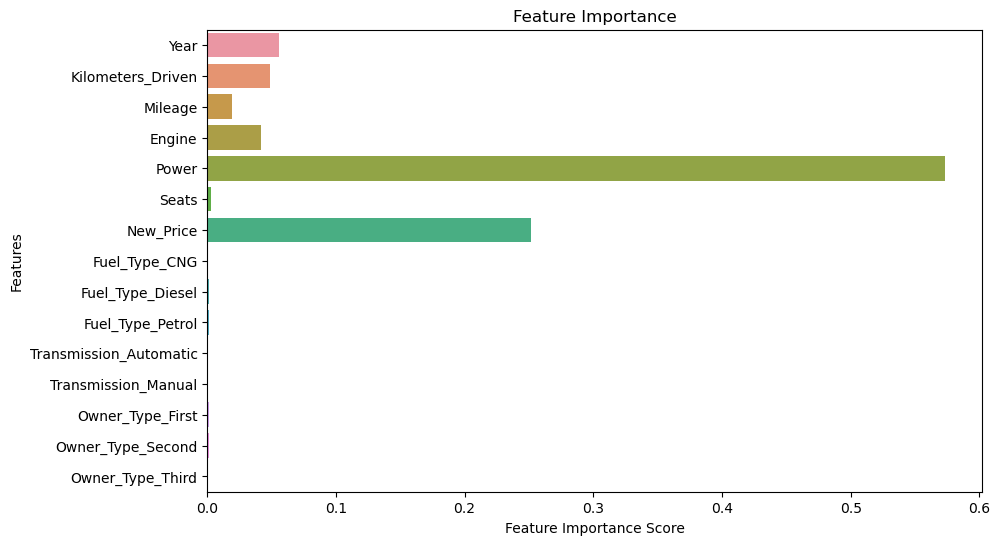

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Step 2: Preprocess the data
# Convert 'New_Price' to float after removing non-numeric characters
df['New_Price'] = df['New_Price'].str.replace(' Lakh', '').str.replace(' Cr', '').astype(float)
df = df.dropna(subset=['New_Price'])
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type'])

# Step 3: Train-test split (80-20 ratio)
X = df.drop(['Name', 'Price', 'Location',], axis=1)
#X = df[['Engine', 'Mileage', 'Power']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Predict prices for testing data
predicted_prices_test = rf_regressor.predict(X_test)

# Step 6: Evaluate model performance on testing data
mse_test = mean_squared_error(y_test, predicted_prices_test)
print("Mean Squared Error on Testing Data:", mse_test)

# Step 7: Visualize feature importance
feature_importance = pd.Series(rf_regressor.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()





### Limiting the max_depth to 3 

>Improving Generalisation: By restricting the depth of the tree, the model focuses on capturing the most important patterns and relationships in the data which improves the model's ability to generalise and make accurate predictions on new, unseen data.

>Reducing Computational Complexity: Limiting the depth helps in reducing the computational complexity in trees that have many levels, making the model more efficient to train and use in production environments.

>Interpretability: Limiting the depth of the tree can provide insights into the most influential features and decision-making process, making it more interpretable.

Overall, limiting the maximum depth of decision trees helps in building more robust, generalisable, interpretable, and computationally efficient machine learning models. It plays a crucial role in mitigating overfitting and improving the overall performance and usability of the model.

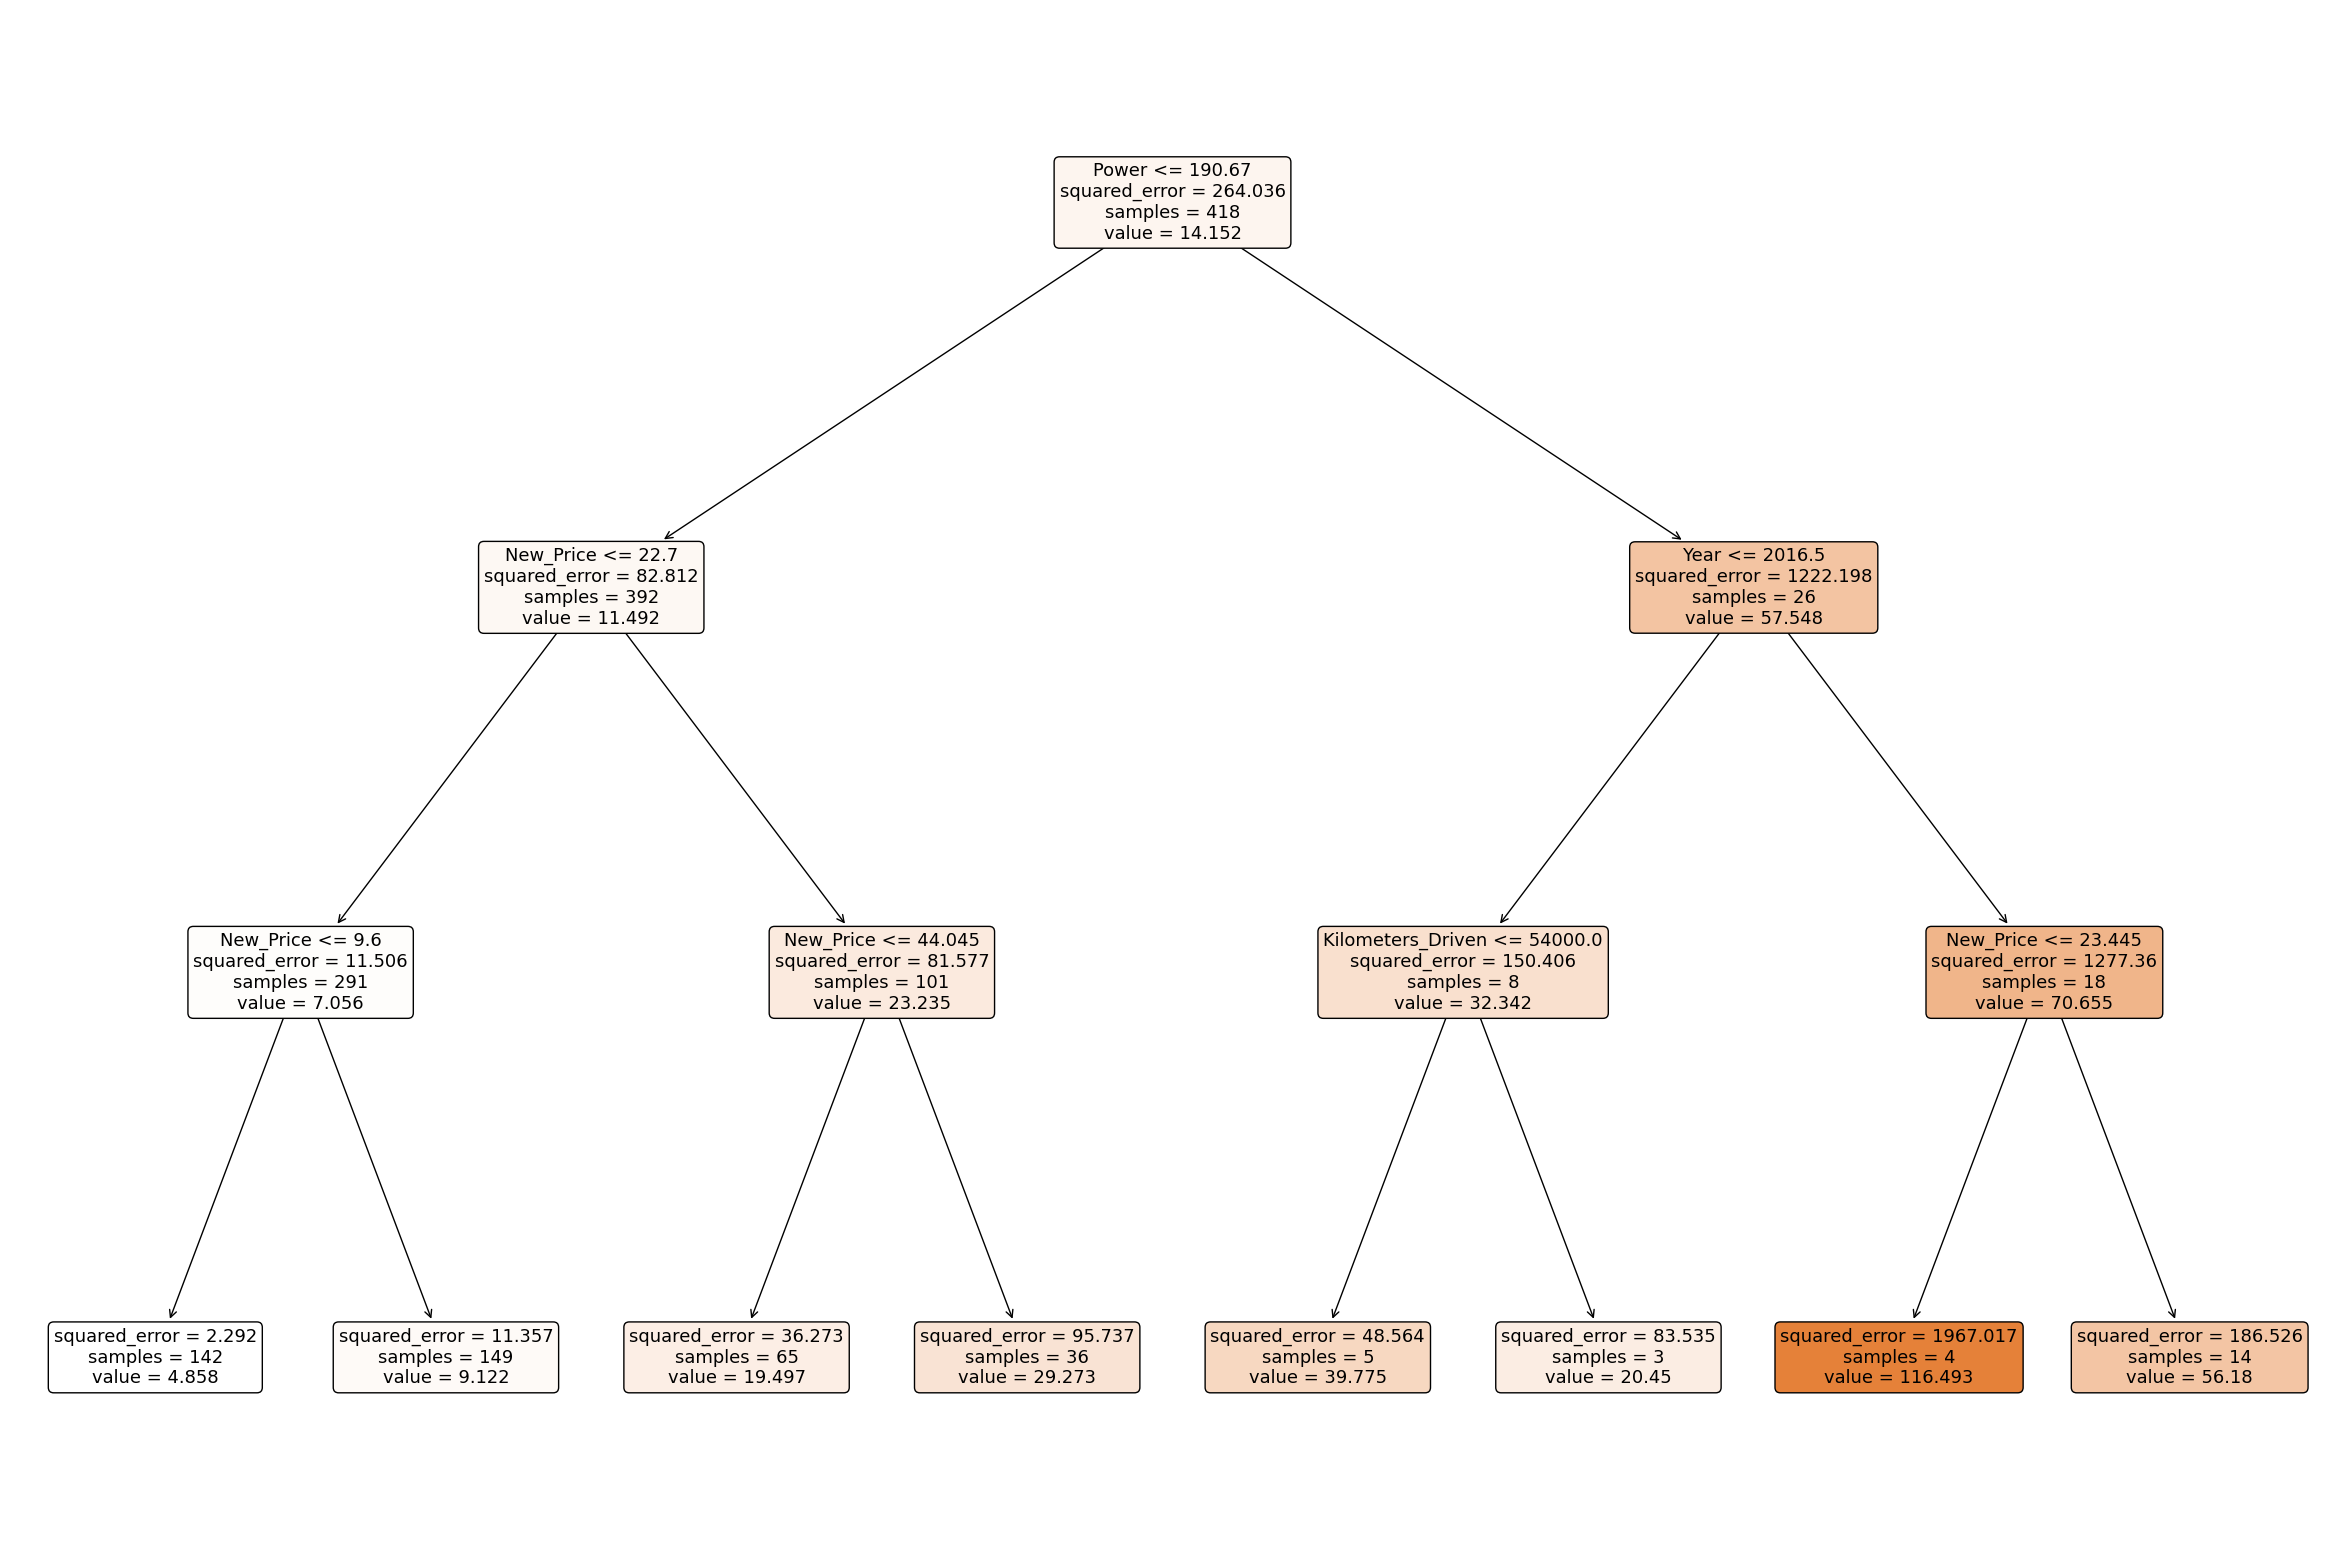

In [48]:
from sklearn.tree import plot_tree
# Step 4: Train the model with a limited max_depth
rf_regressor = RandomForestRegressor(max_depth=3, random_state=42)
rf_regressor.fit(X_train, y_train)

# Extract the first tree from the Random Forest
first_tree = rf_regressor.estimators_[0]

# Plot the first tree
plt.figure(figsize=(30, 20))
plot_tree(first_tree, feature_names=list(X_train.columns), filled=True, rounded=True)
plt.show()

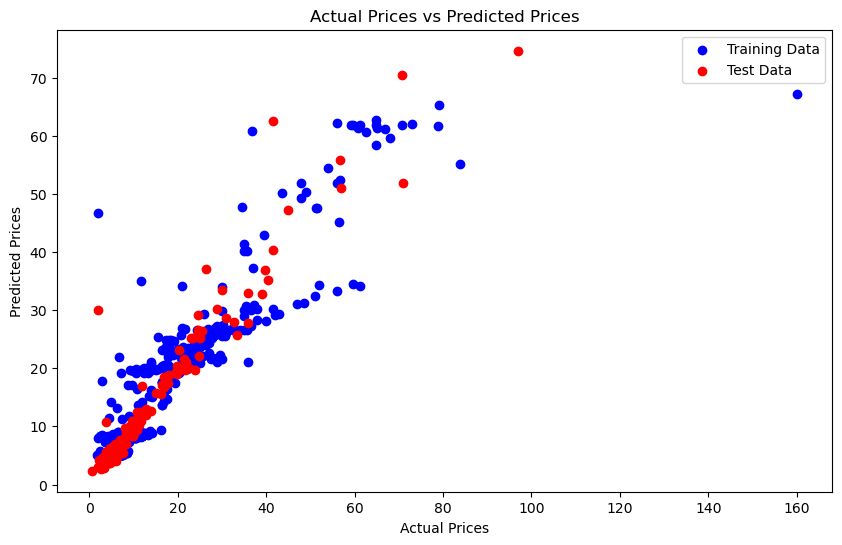

In [49]:
# Step 8: Visualize predicted prices against actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_train, rf_regressor.predict(X_train), color='blue', label='Training Data')
plt.scatter(y_test, predicted_prices_test, color='red', label='Test Data')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

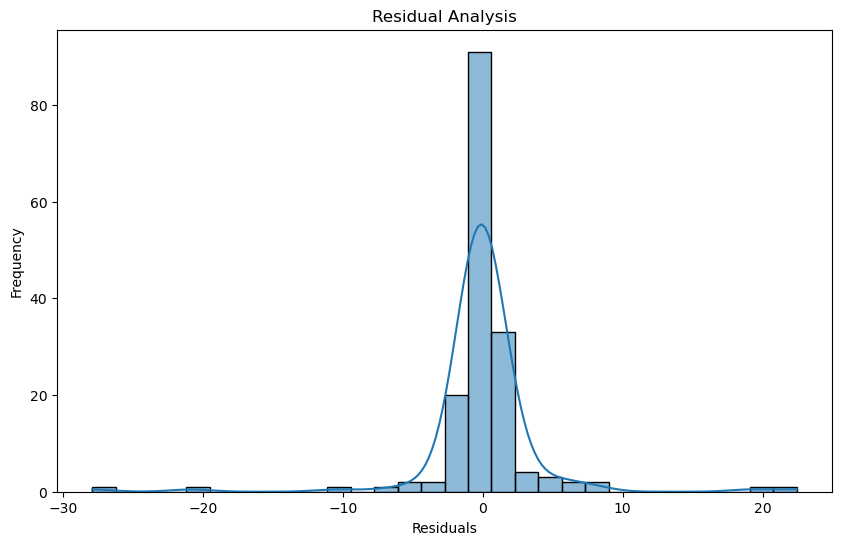

In [50]:
# Step 9: Residual Analysis
residuals = y_test - predicted_prices_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Analysis')
plt.show()

In [51]:
from scipy import stats
anderson_test = stats.anderson(residuals, dist='norm')
print("\nAnderson-Darling Test:")
print("Test Statistic:", anderson_test.statistic)
print("Critical Values:", anderson_test.critical_values)
print("Significance Levels:", anderson_test.significance_level)



Anderson-Darling Test:
Test Statistic: 21.27743694758408
Critical Values: [0.563 0.641 0.769 0.897 1.067]
Significance Levels: [15.  10.   5.   2.5  1. ]


>The Mean Squared Error (MSE) value of 16.65 on the testing data indicates the average squared difference between the actual prices and the predicted prices by the model. A lower MSE value suggests that the model's predictions are closer to the actual values, indicating better performance.

>Actual prices vs Predicted prices: 
The scatter plot shows how well the model's predictions align with the actual prices with both training and test data. The graph shows points lying along a diagonal line proving the close similarity, with some outliers as the prices increases.

>Frequency at Zero Residual: 
Frequency above 80 suggests that a significant portion of the model's predictions exactly matches the actual values in the test data. In other words, the model is very accurate in predicting some instances. This high frequency could indicate that the model is good at capturing certain patterns or relationships in the data, resulting in accurate predictions for those cases.

>Frequency of a Normal Distribution: 
If the actual frequency of a normal distribution at zero residual is slightly higher than the expected frequency of around 50 at 0 residual, it could indicate potential issues about the model and the data such as possible overfitting (A slightly higher frequency at zero residual may not necessarily indicate severe overfitting but could be a subtle indicator that the model is capturing noise or outliers in the training data). However, having higher frequency can also be a positive sign, indicating that the model is capturing important patterns or relationships in the data and is performing well in those cases.

>Anderson-Darling Test: 
The test statistic of 21.2774 is much higher than all the critical values provided. This suggests that the data significantly deviates from a normal distribution at all the tested significance levels (15%, 10%, 5%, 2.5%, 1%). The Anderson-Darling test indicates that the data does not follow a normal distribution. This could have implications for statistical analyses and modeling that assume normality, as deviations from normality may impact the validity of certain statistical tests and assumptions.

## Gradient Boosting Regressor 

>Data:
The code begins by loading the dataset using Pandas and performing preprocessing steps.'New_Price' column is processed to convert its values to float after removing non-numeric characters like 'Lakh' and 'Cr'. Categorical variables such as 'Fuel_Type', 'Transmission', and 'Owner_Type' are one-hot encoded using pd.get_dummies(), creating binary columns for each category and preparing the data for modeling. The dataset is then split into features (X) and the target variable (y), where 'Price' serves as the target. Features include all columns except 'Name', 'Price', and 'Location'. The train-test split is set at an 80-20 ratio using train_test_split() to evaluate the model's performance on unseen data.

>Model Training:
Next, the code trains a Gradient Boosting Regressor model (gb_regressor) on the training data (X_train, y_train) using GradientBoostingRegressor from sklearn. The trained model is then used to predict prices for the testing data (X_test), and the Mean Squared Error (MSE) on the testing data is calculated using mean_squared_error() to quantify the model's accuracy. This step provides insights into how well the model generalises to new, unseen data and helps in assessing its predictive performance.

>Visualization:
Lastly, the code visualizes the feature importance of the trained Gradient Boosting model using a bar plot. The feature_importance variable contains the importance scores of each feature in predicting the target variable (price). The bar plot provides a graphical representation of the most influential features, aiding in understanding which factors have the most significant impact on predicting prices in the dataset.

In summary, the code exemplifies a machine learning pipeline encompassing data preprocessing, model training, evaluation, and visualization of feature importance. It showcases the steps involved in building a predictive model for price prediction based on various features in the dataset, contributing to better insights and decision-making processes in data analysis and modeling tasks.

Mean Squared Error on Testing Data (Gradient Boosting): 17.597939692425758


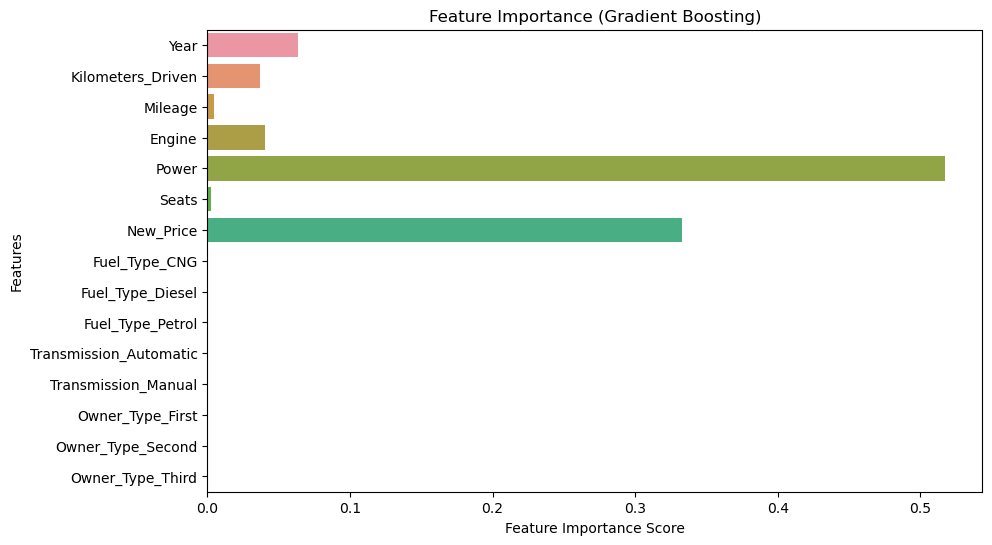

In [52]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Step 2: Preprocess the data
# Convert 'New_Price' to float after removing non-numeric characters
df['New_Price'] = df['New_Price'].str.replace(' Lakh', '').str.replace(' Cr', '').astype(float)
df = df.dropna(subset=['New_Price'])
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type'])

# Step 3: Train-test split (80-20 ratio)
X = df.drop(['Name', 'Price', 'Location',], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model (Gradient Boosting)
gb_regressor = GradientBoostingRegressor(random_state=42)  # Use GradientBoostingRegressor
gb_regressor.fit(X_train, y_train)

# Step 5: Predict prices for testing data
predicted_prices_test = gb_regressor.predict(X_test)

# Step 6: Evaluate model performance on testing data
mse_test = mean_squared_error(y_test, predicted_prices_test)
print("Mean Squared Error on Testing Data (Gradient Boosting):", mse_test)

# Step 7: Visualize feature importance
feature_importance = pd.Series(gb_regressor.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()



The MSE of 17.60 suggests that, on average, the squared difference between the predicted prices and the actual prices in the testing dataset is approximately 17.60. Lower values of MSE are generally desirable, indicating better predictive performance of the model. However, the interpretation of MSE can vary depending on the scale and context of the target variable.


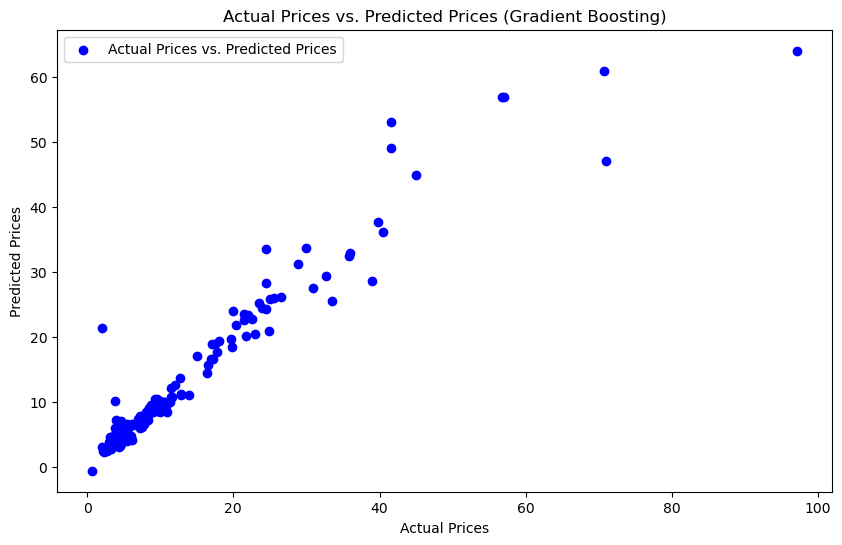

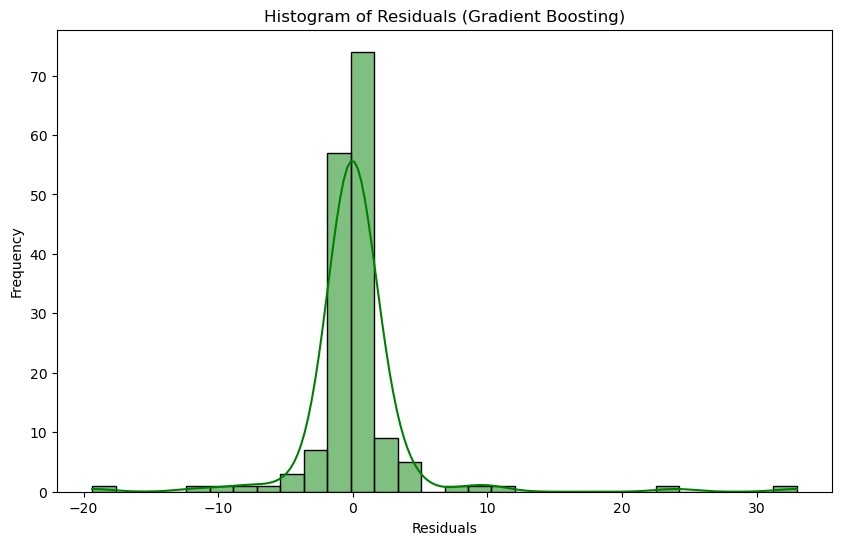

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual prices vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_prices_test, color='blue', label='Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Gradient Boosting)')
plt.legend()
plt.show()

# Plot residuals
residuals = y_test - predicted_prices_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Gradient Boosting)')
plt.show()


>Actual prices vs Predicted prices:
The scatter plot shows how well the model's predictions align with the actual prices. The graph shows points lying along a diagonal line proving the close similarity, with some outliers as the prices increases.

>Distribution of residuals:
The comparison of the density of residuals estimated by the KDE plot (representing a normal distribution) with the actual frequency of residuals represented by the histogram bars shows that the residuals are approximately normally distributed around zero. This is a desirable characteristic in regression analysis because it suggests that the errors (residuals) from the model are random and follow a normal distribution, which is one of the assumptions of linear regression and many other statistical models. If the actual and expected (normal distribution) frequencies of residuals are similar at zero residual, it implies that the model's predictions are unbiased on average, and the errors are distributed evenly around zero without any systematic bias.

## Support Vector Regression (SVR)


## Support Vector Regression

>Data:
The code starts by loading a dataset named "cleaned_data.csv" using Pandas and proceeds with preprocessing steps. Additionally, the 'New_Price' column is processed to convert its values to float after removing non-numeric characters like 'Lakh' and 'Cr'. Categorical variables such as 'Fuel_Type', 'Transmission', and 'Owner_Type' are one-hot encoded using pd.get_dummies(), transforming them into binary columns to prepare the data for modeling. The dataset is then split into features (X) and the target variable (y), with 'Price' serving as the target. Features include all columns except 'Name', 'Price', and 'Location', and the train-test split is set at an 80-20 ratio to assess the model's performance on unseen data.

>Model Training:
The code trains a Support Vector Regressor (SVR) model (svr_regressor) on the training data (X_train, y_train) using the linear kernel. SVR is a type of regression model that utilises support vectors to perform regression tasks. Once trained, the model is used to predict prices for the testing data (X_test), and the Mean Squared Error (MSE) on the testing data is computed using mean_squared_error() to evaluate the model's accuracy and predictive performance.

>Visualisation:
Unlike some models like Gradient Boosting Regressor, SVR does not provide direct feature importance scores or coefficients. Therefore, the code does not include a visualisation of feature importance for SVR. However, an additional step is added to visualise the actual prices versus predicted prices using a scatter plot. This plot compares the actual prices from the testing data (y_test) with the predicted prices generated by the SVR model (predicted_prices_test), providing a visual representation of how well the model's predictions align with the actual prices.

In conclusion, the code demonstrates a machine learning workflow for training an SVR model to predict prices based on various features in the dataset. It covers data preprocessing, model training, evaluation, and includes a visualisation of the model's predictions, contributing to a comprehensive understanding of SVR's performance in regression tasks.

Mean Squared Error on Testing Data (SVR): 17712.277344136124


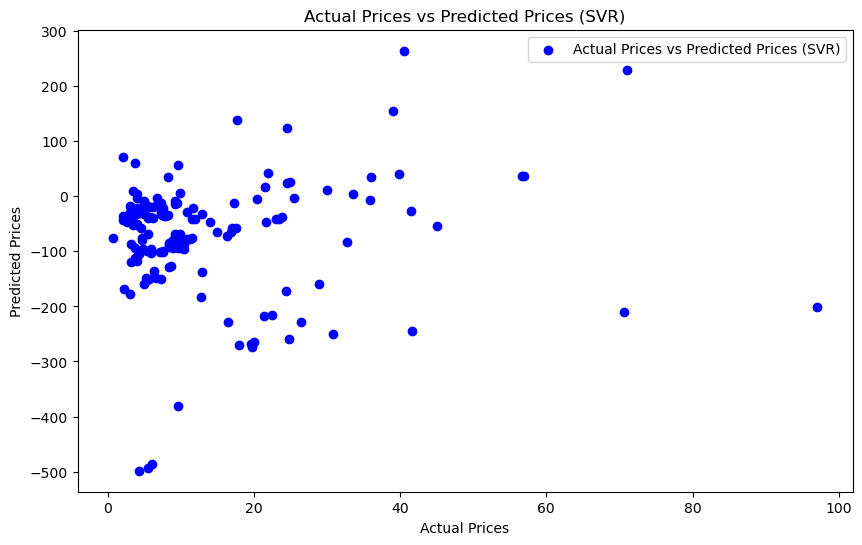

In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR  # Import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Step 2: Preprocess the data
# Convert 'New_Price' to float after removing non-numeric characters
df['New_Price'] = df['New_Price'].str.replace(' Lakh', '').str.replace(' Cr', '').astype(float)
df = df.dropna(subset=['New_Price'])
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type'])

# Step 3: Train-test split (80-20 ratio)
X = df.drop(['Name', 'Price', 'Location'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model - SVR
svr_regressor = SVR(kernel='linear')  # Choose linear kernel for simplicity
svr_regressor.fit(X_train, y_train)

# Step 5: Predict prices for testing data
predicted_prices_test = svr_regressor.predict(X_test)

# Step 6: Evaluate model performance on testing data
mse_test = mean_squared_error(y_test, predicted_prices_test)
print("Mean Squared Error on Testing Data (SVR):", mse_test)

# Step 7: Visualize feature importance (Not applicable for SVR)
# Feature importance is not directly available for SVR, as it doesn't provide coefficients like linear regression

# Additional step: Visualize actual prices vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_prices_test, color='blue', label='Actual Prices vs Predicted Prices (SVR)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (SVR)')
plt.legend()
plt.show()


>Actual prices vs Predicted prices:
The scatter plot above shows the comparison between the model's predictions with the actual prices. The graph shows points scattered all around the graph, implying that the model's predictions do not perfectly align with the true values. 

>The spread of points can provide insights into the model's accuracy and its ability to capture the underlying patterns in the data. Ideally, a good regression model would produce points that closely follow a diagonal line (y=x), indicating a strong correlation between actual and predicted values. However, scattered points away from this line suggest areas where the model may be less accurate or where it struggles to make precise predictions.

### Comparing the Mean Squared Error (MSE) values:

>MSE on Testing Data (Gradient Boosting): 17.597939692425758 

>MSE on Testing Data (Random Forest): 16.646954264545442 

>MSE on Testing Data (SVR): 17712.277344136124 

We can make the following analysis:

Gradient Boosting and Random Forest have significantly lower MSE values compared to SVR. This indicates that both Gradient Boosting and Random Forest models perform much better than the SVR model in terms of predicting prices on the testing dataset.
Gradient Boosting has a slightly higher MSE than Random Forest, but the difference is not substantial. Both models seem to perform similarly, but Random Forest has a slightly better performance based on the MSE metric.
The SVR model has a very high MSE compared to Gradient Boosting and Random Forest. This suggests that the SVR model might not be suitable for this particular dataset or might require further tuning to improve its performance.
In summary, based on the MSE metric, Gradient Boosting and Random Forest models outperform the SVR model in predicting prices on the testing dataset, with Random Forest showing slightly better performance than Gradient Boosting.